In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab
import mlflow

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler



In [53]:
csv_train = pd.read_csv('train_ver2.csv')

csv_train.columns

C:\Users\Administrador\AppData\Local\Temp\ipykernel_2092\560558549.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_train = pd.read_csv('train_ver2.csv')


Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

<h1>ML Flow Stuff</h1>

In [72]:
expermient_name = 'analisis_univariado'

dict_values = {
    'mse':0,
    'r2':0,
    'rmse':0
}


def load_create_experiment():
    if mlflow.get_experiment_by_name(expermient_name):
        return mlflow.get_experiment_by_name(expermient_name)
    return mlflow.create_experiment(expermient_name)
    
current_experiment = load_create_experiment()
mlflow.set_experiment(expermient_name)

<Experiment: artifact_location='file:///C:/Users/Administrador/Desktop/DataMining/segundo_parcial/mlruns/1', creation_time=1671407413489, experiment_id='1', last_update_time=1671407413489, lifecycle_stage='active', name='analisis_univariado', tags={}>

Loggin Params

In [ ]:

#columns_to_drop = ['Model']
#mlflow.log_param('drop_columns',columns_to_drop) 1th Param name, value


Set Tags

In [ ]:
#mlflow.set_tag('Summary',summary)


Loggin Metrics

In [ ]:
#mlflow.log_metrics(dict_values)


Save Picture

In [ ]:
#plt.savefig('plotname.png')
#mlflow.log_artifact('plotname.png')
#plt.show()

<h2>Analisis Univariado</h2>

In [73]:
column_to_analize = 'conyuemp'
mlflow.log_param('Column',column_to_analize)


'conyuemp'

Bar plot

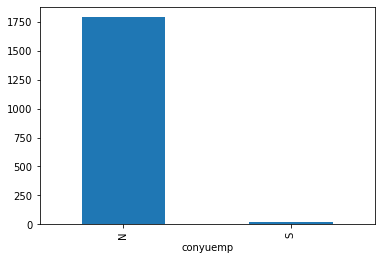

In [74]:
img_name = column_to_analize + '_bar_plot.png'
fig = csv_train.groupby(column_to_analize).size().plot(kind='bar').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

Box Plot

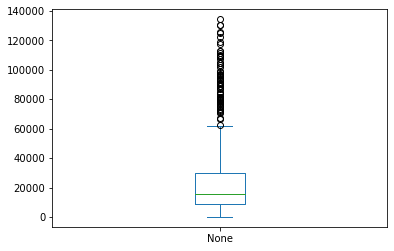

In [29]:
img_name = column_to_analize + '_box_plot.png'
fig = csv_train.groupby(column_to_analize).size().plot(kind='box').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

Comment Column

In [75]:
comment = 'Muy sesgado a NO, eliminar'
mlflow.set_tag('Comentario',comment)


<h2>Variables Dummies<h2>

In [77]:
column_dummy = 'canal_entrada'
var_dummies = pd.get_dummies(csv_train[column_dummy])
csv_train = csv_train.drop(columns=[column_dummy])

csv_train[var_dummies.columns] = var_dummies

C:\Users\Administrador\AppData\Local\Temp\ipykernel_2092\1095953066.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  csv_train[var_dummies.columns] = var_dummies
C:\Users\Administrador\AppData\Local\Temp\ipykernel_2092\1095953066.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  csv_train[var_dummies.columns] = var_dummies
C:\Users\Administrador\AppData\Local\Temp\ipykernel_2092\1095953066.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

In [78]:
mlflow.set_tag('Var dummies',var_dummies.columns)
print(var_dummies.columns)


Index(['004', '007', '013', '025', 'K00', 'KAA', 'KAB', 'KAC', 'KAD', 'KAE',
       ...
       'KHK', 'KHL', 'KHM', 'KHN', 'KHO', 'KHP', 'KHQ', 'KHR', 'KHS', 'RED'],
      dtype='object', length=162)


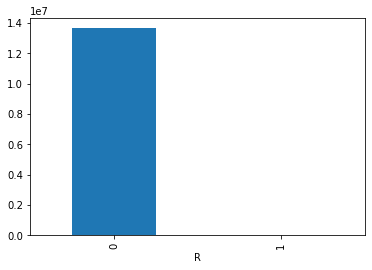

In [69]:
feature_dummy = 'R'
img_name = column_dummy + '_' + feature_dummy + '_bar_plot.png'
fig = var_dummies.groupby(feature_dummy).size().plot(kind='bar').get_figure()
fig.savefig(img_name)
mlflow.log_artifact(img_name)

End MlFlow Run

In [76]:
mlflow.end_run()